# U.S. Medical Insurance Costs

Project by TheJJSerg, Sunilyr, and Sug900

This group came together via Codecademy's Data Science Career Track. The first unit of the course, Data Science Foundations 1, revolved around learning and practicing Python fundamentals on U.S. Medical Insurance Data.

This project will be using the learned Python funamental techniques learned in the course to analyze data from a CSV file with medical insurance cost. We will be going over the following prompts:
1. 
2. 
3. 

In [1]:
# Import necessary libraries
import csv # Python library used for reading and writing tabular data in CSV format.
import pandas as pd # Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import json # Python library for encoding and decoding custom objects by using JSON encoder and decoder classes.
import numpy as np # Python library for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import seaborn as sns #Python library for statistical visualizations
import statistics as stat #Python library for statistical operations
import matplotlib.pyplot as plt # Python library for creating graphs
from scipy import stats # Python library for linear regression
# Note to Team - I don't know if it's best practice to include all of these libraries. I'm not sure which ones we will need for the project. I just included all of the libraries I am familiar with to cover our bases. - TheJJSerg

This project will use the following Python libraries:
* csv, this library is used for reading and writing tabular data in CSV format.
* pandas, this library is used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
* json, this library is used for encoding and decoding custom objects by using JSON encoder and decoder classes.
* numpy, this library is used for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

## An Overview of the Data
The data for this project can be found on [Kaggle, Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance). There are 7 columns:
1. age - age of primary beneficiary
2. sex - insurance contractor gender: male or female
3. bmi - Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children - number of children covered by health insurance, ie - the number of dependents
5. smoker - represents if the primary beneficiary is a smoker: yes or no
6. region - the beneficiary's residential area in the US: northeast, southeast, southwest, or northwest
7. charges - individual medical costs billed by the health insurance

There are 1,338 observations in the dataset. There are no NA values in the dataset, and the types of the columns in the DataFrame look to be accurately predicted. Therefore, there will be little to no data cleaning. 

The inspiration of the dataset is the question, "Can you accurately predict insurance costs?"

Our team will observe the question along with the following:
1. a
2. b
3. c

### Assign Variable Names
First, we will read the csv file, and then, we will assign variables to conduct analysis on the dataset.

In [2]:
# Read the insurance.csv using the pandas library
insurance = pd.read_csv("insurance.csv")

# Define a function to load data into lists
def load_data(empty_list, column):
    for row in insurance[column]:
        empty_list.append(row)
    return empty_list

# Define the empty lists
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

# Use the function to load data to the empty lists
load_data(age, "age")
load_data(sex, "sex")
load_data(bmi, "bmi")
load_data(children, "children")
load_data(smoker, "smoker")
load_data(region, "region")
load_data(charges, "charges")
print("All data has been loaded into their respective lists.")

All data has been loaded into their respective lists.


## Gustavo's Section
1. Calculate the average age of the patients
2. Investigate where are the patients from
3. Look at cost between smokers and non-smokers
4. Add summary of the data and description of the variables
4. Add some statistical analysis of the variables

This first section creates a list to handle the data

In [3]:
def insurance_file_manager():
    with open ("insurance.csv") as insurance_data:
        insurance_cost = csv.DictReader(insurance_data)
        insurances = []
        for items in insurance_cost:
            insurances.append(items)
    return insurances
insurance_list = insurance_file_manager()

In [4]:
#Using stats mean method to calculate the average age
avg_age = round(stat.mean(age),2)
print(f'The average age of the patients is {avg_age} years old')

The average age of the patients is 39.21 years old


In [5]:
#Using stats mode method to calculate the most common region
region_mode = stat.mode(region)
print(f'The majority of the patients come from {region_mode}')

The majority of the patients come from southeast


In [6]:
def insurance_smoker_manager(insurance_list):
    #starting counter of smokers & non-smokers cost
    charges_smokers = 0
    charges_non_smokers = 0
    #loop to go through the list for smokers and non skomers
    for items in insurance_list:
        if items["smoker"] == "yes":
            charges_smokers = charges_smokers + float(items["charges"])
        if items["smoker"] == "no":
            charges_non_smokers = charges_non_smokers + float(items["charges"])
    #calculate the average of cost for both groups
    avg_smokers = charges_smokers/len(insurance_list)
    avg_non_smokers = charges_non_smokers/len(insurance_list)
    #print results
    print("Smokers Average Insurance Cost is: " + str(round(avg_smokers,2)))
    print("Non Smokers Average Insurance Cost is: " + str(round(avg_non_smokers,2)))
insurance_smoker_manager(insurance_list)

Smokers Average Insurance Cost is: 6563.35
Non Smokers Average Insurance Cost is: 6707.07


### Data frame summary
 
- As part of the data exploratory analysis, an overview of the dataset and what type of variables the project has is a good starting point:
    - The count shows 1338 for all columns showing no missing data
    - The unique count allows to check if errors or strange unique inputs are present in categorical or binary variables for example
    - The rest of the statistical values are summarized to allow us to evaluate what type of data are we dealing with and how the data is distributed 

In [7]:
#Summary of the data types and manin statistics of the data frame
insurance_data_summary = insurance.describe(include='all')
print(insurance.dtypes)
print(insurance_data_summary)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     

### Box Plot Region and Insurance cost by gender 
- All the regions show similar medians but shout and north east have broader IQR
- It is interesting that there are many outliers in all four groups
- In all regions, the male group seems to have a wider IQR
- More information about plot plots can be found [here](https://builtin.com/data-science/boxplot)

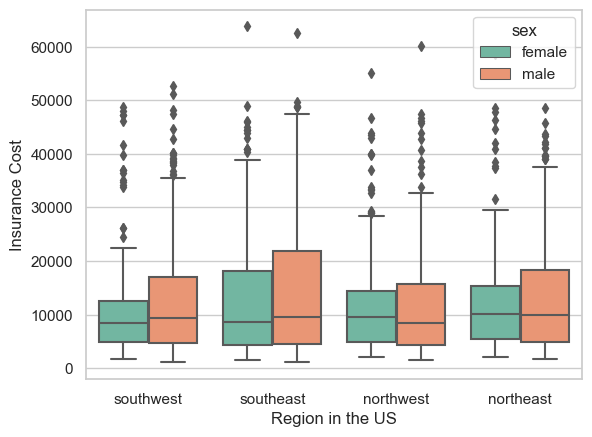

<Figure size 640x480 with 0 Axes>

In [8]:
#plotting a box plot with regions and gender
sns.set(style='whitegrid')
sns.boxplot(x='region', y='charges', palette="Set2", hue='sex', data=insurance)
plt.xlabel("Region in the US")
plt.ylabel("Insurance Cost")
plt.show()
plt.clf()

### Box Plot Smoker status and Insurance cost by gender
- This analysis shows that the insurance is highly linked to the smoker and non-smoker status
- Some outliers can still be seen in the non-smokers group, probably other factors constributing to higher insurance costs


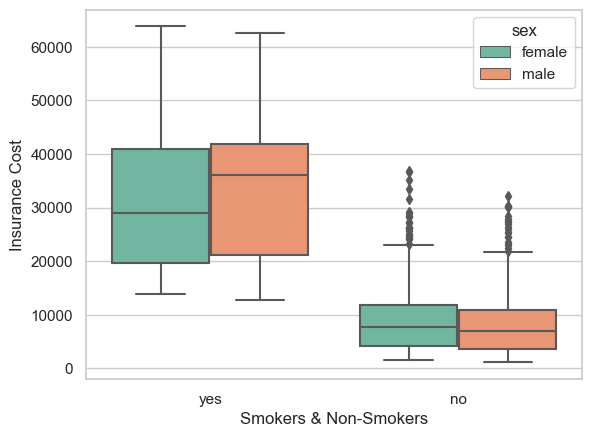

<Figure size 640x480 with 0 Axes>

In [9]:
#box plot for smokers and non-smokers
sns.set(style='whitegrid')
sns.boxplot(x='smoker', y='charges', palette="Set2", hue='sex', data=insurance)
plt.xlabel("Smokers & Non-Smokers")
plt.ylabel("Insurance Cost")
plt.show()
plt.clf()

### Histogram of insurance costs by gender
- When looking at the histograms it can be seen that there no major differences between gender when it comes to the insurance cost

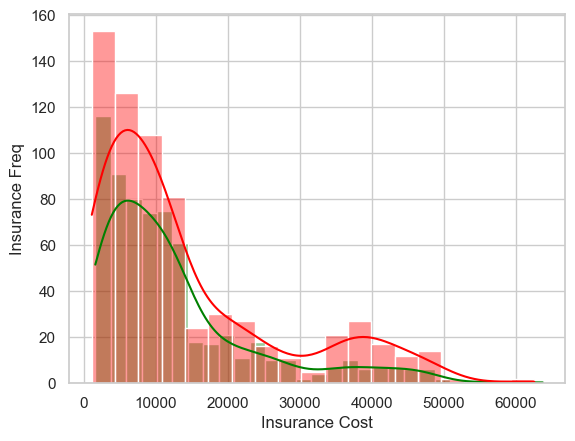

<Figure size 640x480 with 0 Axes>

In [10]:
#Overlapped histograms if insurance cost
insurance_females = insurance.charges[insurance.sex == 'female']
insurance_males = insurance.charges[insurance.sex == 'male']
sns.set(style='whitegrid')
sns.histplot(insurance_females,color="green", alpha =0.4, kde=True)
sns.histplot(insurance_males,color = "red", alpha = 0.4, kde=True)
plt.xlabel("Insurance Cost")
plt.ylabel("Insurance Freq")
plt.show()
plt.clf()

## TheJJSerg's Section
Linear Regression is a statistical model which estimates the linear relationshiop between a scalar response and one or more explantory variables. The general formula for linear regression is 

```
y = m*x + b
``` 
`m` is the slope of the line, and `b` is the intercept, where the line crosses the y-axis.

We will first define simple linear regressions, which is one variable (the independent variable) attempting to estimate the dependent variable.

The independent variables will be 
1. age
2. sex
3. bmi
4. children
5. smoker
6. region

`charges` will be the dependent variable, as we will be trying to estimate it using the independent variables above. We will be finding the line of best fit by trial-and-error

### Initial Steps to Perform Simple Linear Regressions

We will first use a **brute-force** method to find a simple linear regression line. The weaknesses of the brute-force method is the computing power of the machine. It will take a long time to use a `for loop` to find the best linear regression line for lengthy ranges, so we will attempt to do the brute-force method using small ranges.

In [11]:
# Define a function to get the name of a variable
def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None

# Create a list of possible `m` values and `b` values
possible_ms = [number for number in range(0, 11)]
possible_bs = [number for number in range(0, 21)]

# Define the get_y function
def get_y(m, b, x):
    y = m*x + b
    return y

# Define the calculate_error function
def calculate_error(m, b, point):
    # Define the point values
    x_point = point[0]
    y_point = point[1]
    
    # Call the get_y function
    get_y_point = get_y(m = m, x = x_point, b = b)
    
    # Find the difference, or the error, between the linear regression line and the actual value
    difference = y_point - get_y_point
    
    # Find the absolute value of the difference and define as the error
    error = abs(difference)
    
    # Return the error
    return error

# Define the calculate_all_error function
def calculate_all_error(m, b, data):
    error = 0
    for point in data:
        current_error = calculate_error(m, b, point)
        error += current_error
        
    return error

# Define the datapoints function
def datapoints(x_points, y_points):
    data = []
    for i in range(len(x_points)):
        data.append((x_points[i], y_points[i]))
        
    return data

# Define the simple linear regression function
def simple_linear_regression(independent, dependent):
    data = datapoints(independent, dependent)
    
    # Obtain the variable names
    independent_word = get_variable_name(independent)
    dependent_word = get_variable_name(dependent)
    
    # Define smallest_error as infinity so that the first error will be smallest
    smallest_error = float("inf")

    # Define the line of best fit variables
    best_m = 0
    best_b = 0
    
    for m in possible_ms:
        for b in possible_bs:
            error = calculate_all_error(m, b, data)
            
            if error < smallest_error:
                smallest_error = error
                best_m = m
                best_b = b
                
    print("The best m is " + str(best_m))
    print("The best b is " + str(best_b))
    print("The Linear Regression Line is ")
    print(dependent_word.title() + " = " + str(round(best_m, 2)) + " * " + independent_word.title() + " + " + str(round(best_b, 2)))
    print("The smallest error is " + str(round(smallest_error, 2)))

### Simple Linear Regression Calculations

We will now perform simple linear regression calculations

#### Simple Linear Regression for Age to Estimate Charges

In [12]:
# Attempt the Brute-Force Method
simple_linear_regression(age, charges)

The best m is 10
The best b is 20
The Linear Regression Line is 
Charges = 10 * Age + 20
The smallest error is 17204474.99


The brute-force method found the linear regression line as `Charges = 10 * age + 20`. However, the Standard Error is quite large at 17,204,474.99. This isn't a great linear regression line. We will attempt another method to obtain a more accurate linear regression line.

In [13]:
# Define the Simple Linear Regression Function
def simple_linear_regression(x, y):
    
    # Define the title of the variables
    x_word = get_variable_name(x)
    y_word = get_variable_name(y)
    
    # Define the following using linear regression
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    
    # This function needs to be defined inside of the function for simple_linear_regression() to work
    def myfunc(x):
        return slope * x + intercept
    
    # Create a model
    model = list(map(myfunc, x))
    
    # Create a scatterplot and draw the linear regression line
    plt.scatter(x, y)
    plt.plot(x, model)
    
    # Label the graph
    plt.title(x_word.title() + " Estimating " + y_word.title() + " via Linear Regression")
    plt.xlabel(x_word.title())
    plt.ylabel(y_word.title())
    
    # Outputs
    plt.show() 
    print("The Linear Regression Line is ")
    print(y_word.title() + " = " + str(round(slope, 2)) + " * " + x_word.title() + " + " + str(round(intercept, 2)))
    print("R is " + str(round(r, 3)))
    print("Standard Error is " + str(round(std_err, 3)))
    return [slope, intercept, r, p, std_err]

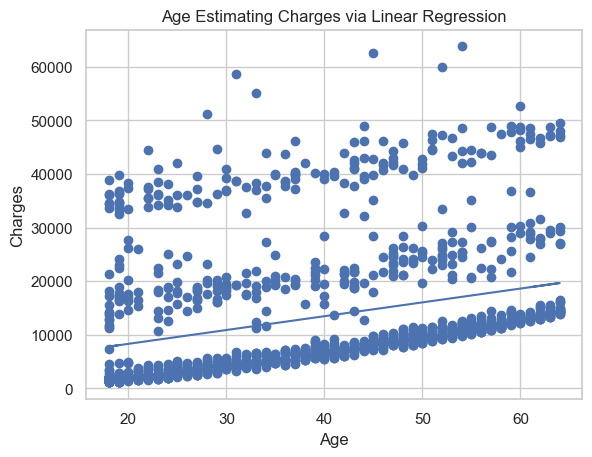

The Linear Regression Line is 
Charges = 257.72 * Age + 3165.89
R is 0.299
Standard Error is 22.502


In [14]:
# Use simple_linear_regression to estimate charges with age
simple_linear_regression_age = simple_linear_regression(x = age, y = charges)

We see that the linear regression of  has a significantly smaller error than the brute-force method linear regression of , so the 

We see that the brute-force method's linear regression line of `Charges = 10 * Age + 20` has a significantly larger error than the second linear regresson line of `Charges = 257.72 * Age + 3165.89`, so the second linear regression line is more accurate at estimating charges with age.

**Interpretation of `Charges = 257.72 * Age + 3165.89`**: <br>
Starting at \\$3,165.89, `Charges` increases by \\$257.72 for every `Age` on an individual on the insurance plan.

We can use the simple linear regression function created above to find linear regression lines to use a quantitative variable in our dataset to estimate charges or other quantitative variables. 

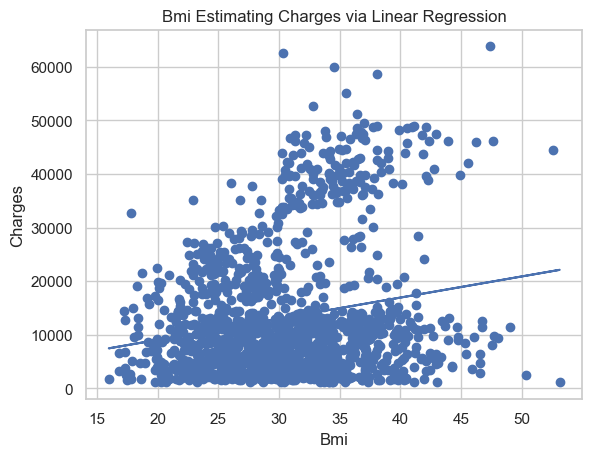

The Linear Regression Line is 
Charges = 393.87 * Bmi + 1192.94
R is 0.198
Standard Error is 53.251


In [15]:
# Use simple_linear_regression to estimate charges with bmi
simple_linear_regression_bmi = simple_linear_regression(x = bmi, y = charges)

**Interpretation of `Charges = 393.87 * BMI + 1192.94`**: <br>
Starting at \\$1,192.94 `Charges` increases by \\$393.87 multiplied by the `BMI` for an individual on the insurance plan.

# Sunil's Section
#13 Figure out what the average age is for someone who has at least one child in this dataset


In [16]:
age_and_children = list(zip(age, children)) #Merge age and children lists using zip; make sure to convert
with_children = [] #Empty list for storing the ages of subjects with 1 or more children

def average_age_with_children(n):
    
    for subject in age_and_children:
        if subject[1] >= n:
            with_children.append(subject[0])
            
    mean_age_with_kids = round(sum(with_children)/len(with_children), 2) #Calculate mean age
    print("The average age for a person with at least", n, "children in this dataset is", mean_age_with_kids, "years.")
    return


average_age_with_children(1)


The average age for a person with at least 1 children in this dataset is 39.78 years.
